In [3]:
from duckduckgo_search import ddg_images
from fastcore.all import *
from fastdownload import download_url
from fastai.vision.all import *
from time import sleep

## Download images of birds and non-birds

In [1]:
def search_images(term, max_images=100): 
    return L(ddg_images(term, max_results=max_images)).itemgot('image')

In [8]:
download_url(search_images('bird photos', max_images=1)[0], 'bird.jpg', show_progress=False)

Path('bird.jpg')

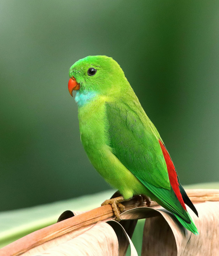

In [5]:
Image.open('bird.jpg').to_thumb(256,256)

In [6]:
download_url(search_images('forest photos', max_images=1)[0], 'forest.jpg', show_progress=False)

Path('forest.jpg')

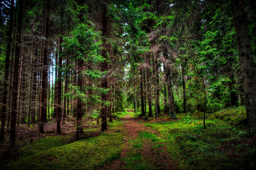

In [7]:
Image.open('forest.jpg').to_thumb(256,256)

In [9]:
path = Path('bird_or_not')
for o in ['forest','bird']:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} photo'))
    sleep(5)
    download_images(dest, urls=search_images(f'{o} sun photo'))
    sleep(5)
    download_images(dest, urls=search_images(f'{o} shade photo'))
    sleep(5)
    resize_images(path/o, max_size=400, dest=path/o)

In [10]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

17

## Train our model

In [11]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path)

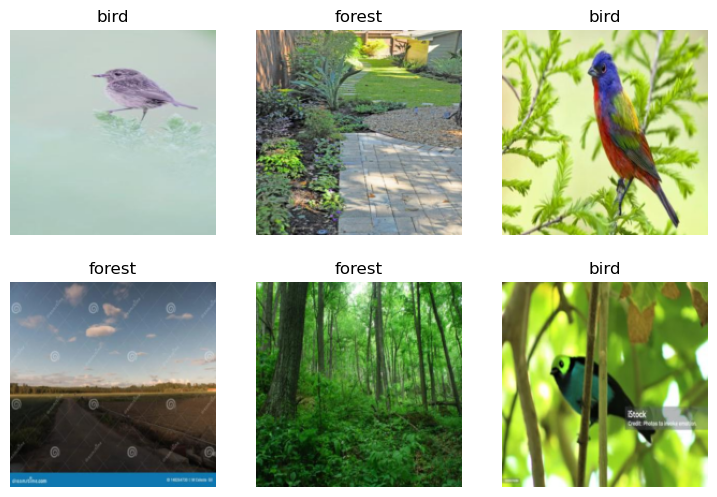

In [12]:
dls.show_batch(max_n=6)

In [14]:
learn = vision_learner(dls, resnet18, metrics=error_rate)

In [15]:
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,0.619974,0.128351,0.060000,01:10


epoch,train_loss,valid_loss,error_rate,time
0,0.094756,0.034402,0.020000,01:51
1,0.047327,0.051450,0.030000,01:53
2,0.033804,0.086629,0.040000,01:56


## Test model

In [16]:
is_bird,_,probs = learn.predict(PILImage.create('bird.jpg'))
print(f"This is a: {is_bird}.")
print(f"Probability it's a bird: {probs[0]:.4f}")

This is a: bird.
Probability it's a bird: 0.9995


In [17]:
learn.export('model.pkl')